In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import numpy as np
from skimage.io import imread
from skimage.transform import rescale
from scipy.interpolate import griddata

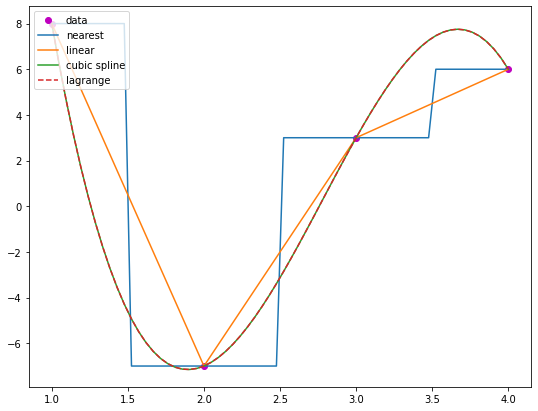

In [2]:
# Exercise 1

x = np.array([1,2,3,4])
y = np.array([8,-7,3,6])

f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind ='linear')
f3 = interp1d(x, y, kind='cubic')
f4 = lagrange(x, y)

xnew = np.linspace(1, 4, num=64, endpoint=True)

fig = plt.figure(figsize = (9,7))
plt.plot(x, y, 'om', xnew, f1(xnew), '-', xnew, f2(xnew), '-', xnew, f3(xnew), '-', xnew, f4(xnew), '--')
plt.legend(['data', 'nearest', 'linear', 'cubic spline', 'lagrange'], loc='upper left')
plt.show()

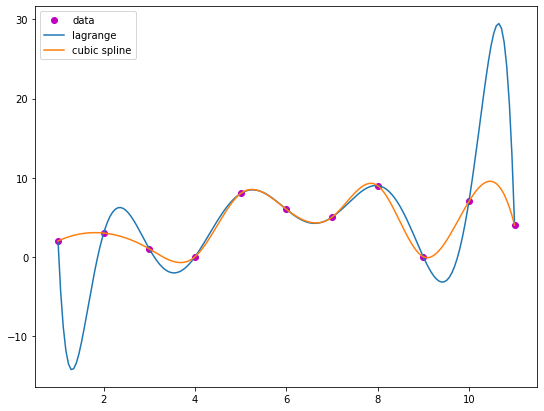

In [3]:
# Exercise 2

x = np.array([1,2,3,4,5,6,7,8,9,10,11])
y = np.array([2,3,1,0,8,6,5,9,0,7,4])

la = lagrange(x, y)
cu = interp1d(x, y, kind='cubic')

xnew = np.linspace(1, 11, num=176, endpoint=True)

fig = plt.figure(figsize = (9,7))
plt.plot(x, y, 'om', xnew, la(xnew), '-', xnew, cu(xnew), '-')
plt.legend(['data', 'lagrange', 'cubic spline'], loc='upper left')
plt.show()

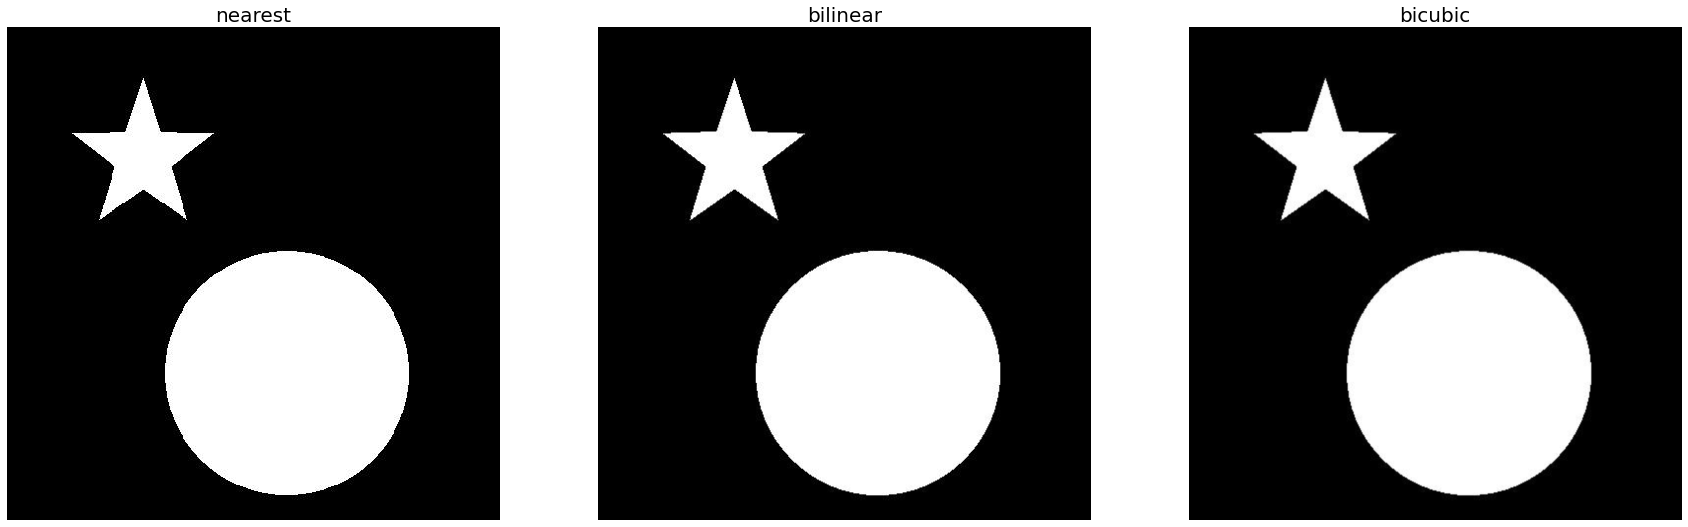

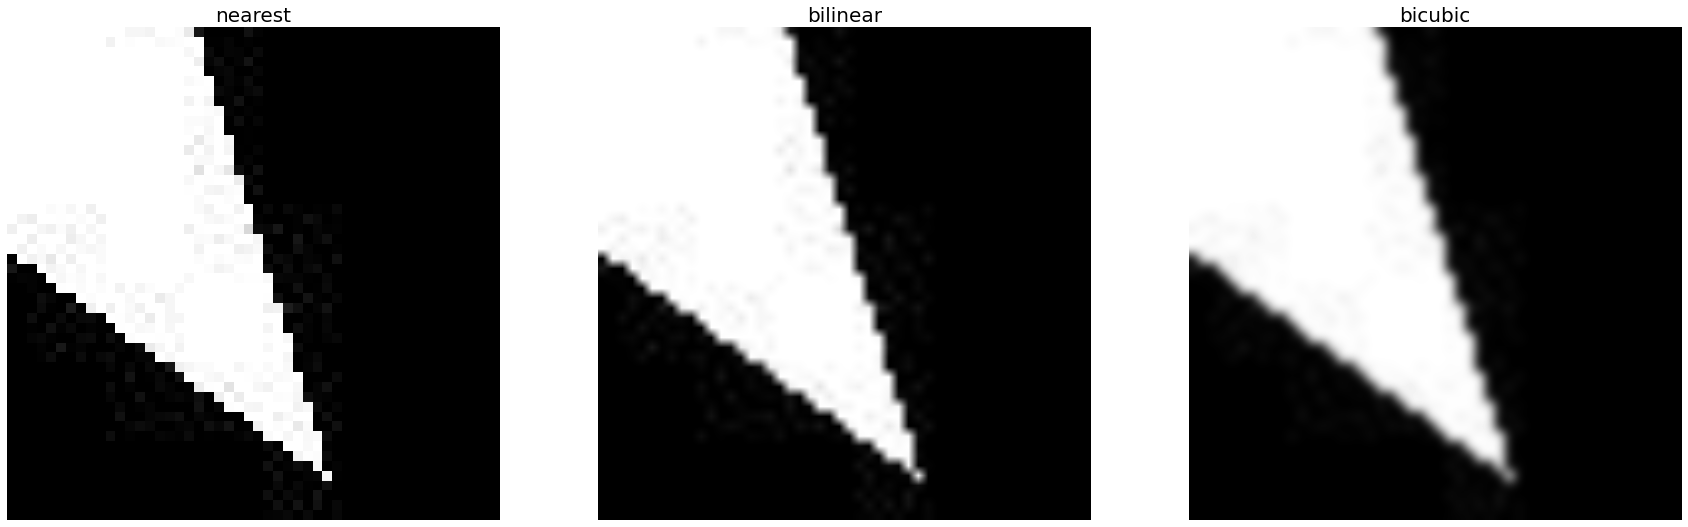

In [4]:
# Exercise 3

im = imread('star&circle.jpg')

plt.figure(figsize=(30, 11))
plt.subplot(131), plt.imshow(im, cmap='gray', interpolation='nearest'), plt.axis('off'),
plt.title('nearest', size=20)
plt.subplot(132), plt.imshow(im, cmap='gray', interpolation='bilinear'), plt.axis('off'),
plt.title('bilinear', size=20)
plt.subplot(133), plt.imshow(im, cmap='gray', interpolation='bicubic'), plt.axis('off'),
plt.title('bicubic', size=20)
plt.show()

im = im[150:200, 150:200]

plt.figure(figsize=(30, 11))
plt.subplot(131), plt.imshow(im, cmap='gray', interpolation='nearest'), plt.axis('off'),
plt.title('nearest', size=20)
plt.subplot(132), plt.imshow(im, cmap='gray', interpolation='bilinear'), plt.axis('off'),
plt.title('bilinear', size=20)
plt.subplot(133), plt.imshow(im, cmap='gray', interpolation='bicubic'), plt.axis('off'),
plt.title('bicubic', size=20)
plt.show()

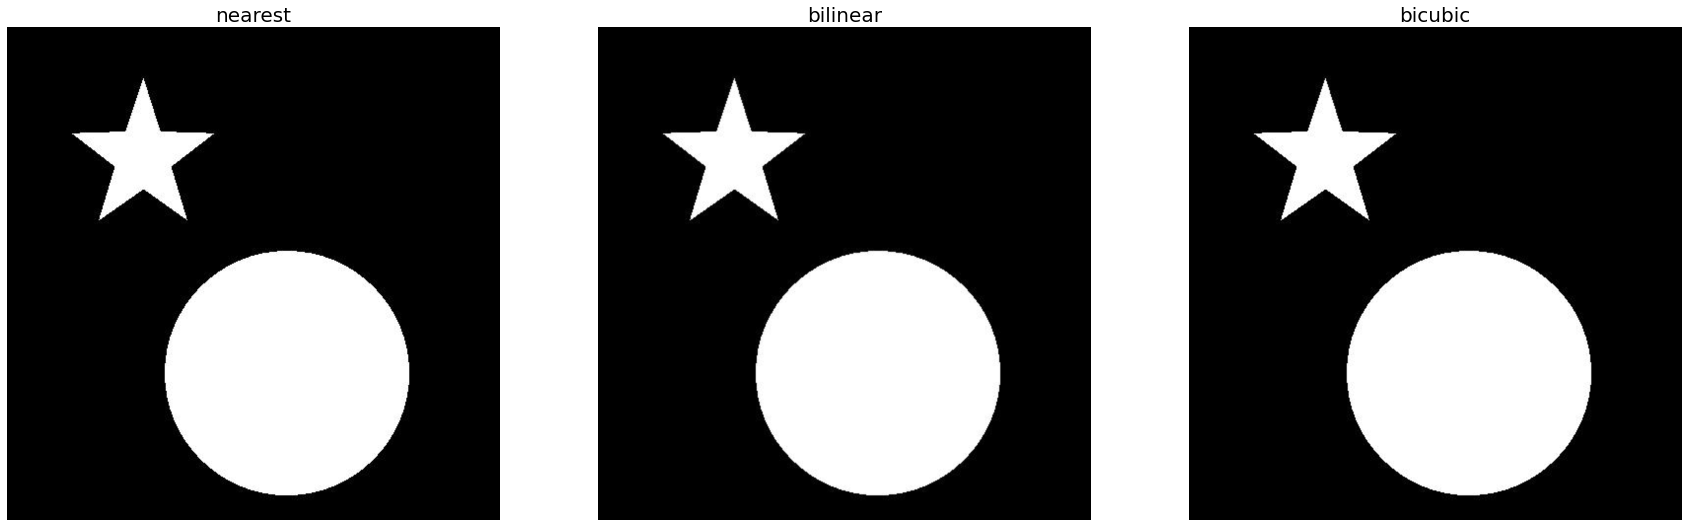

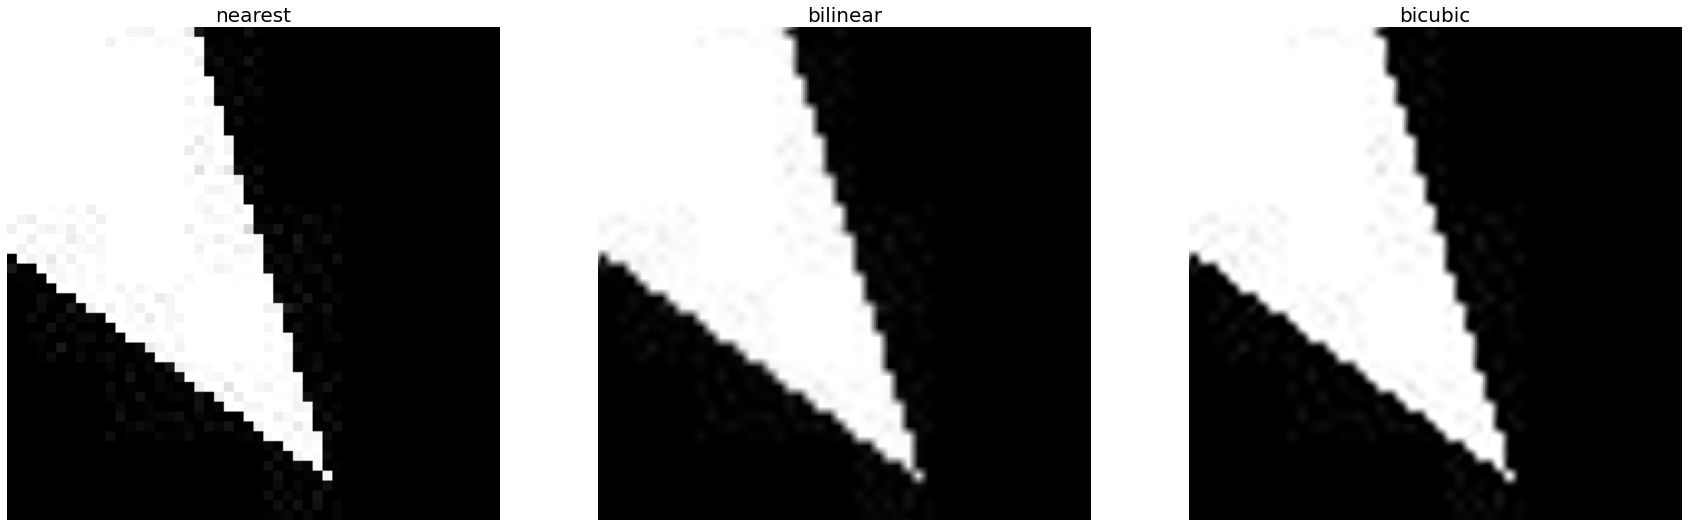

In [5]:
# Exercise 4

im = imread('star&circle.jpg')

plt.figure(figsize=(30, 11))
plt.subplot(131), plt.imshow(rescale(im, 5, order = 0), cmap='gray'), plt.axis('off'),
plt.title('nearest', size=20)
plt.subplot(132), plt.imshow(rescale(im, 5, order = 1), cmap='gray'), plt.axis('off'),
plt.title('bilinear', size=20)
plt.subplot(133), plt.imshow(rescale(im, 5, order = 3), cmap='gray'), plt.axis('off'),
plt.title('bicubic', size=20)
plt.show()

im = im[150:200, 150:200]

plt.figure(figsize=(30, 11))
plt.subplot(131), plt.imshow(rescale(im, 5, order = 0), cmap='gray'), plt.axis('off'),
plt.title('nearest', size=20)
plt.subplot(132), plt.imshow(rescale(im, 5, order = 1), cmap='gray'), plt.axis('off'),
plt.title('bilinear', size=20)
plt.subplot(133), plt.imshow(rescale(im, 5, order = 3), cmap='gray'), plt.axis('off'),
plt.title('bicubic', size=20)
plt.show()

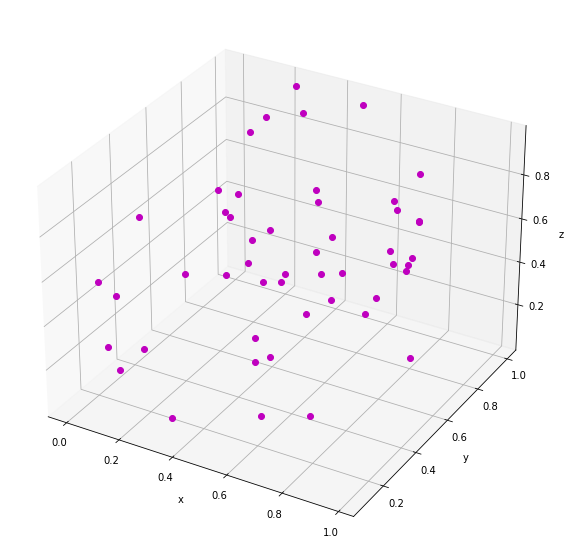

In [6]:
# Exercise 5

N = 50
R = np.random.rand(N, 2)
X, Y = R[:,0], R[:,1]
Z = np.random.rand(N)

fig = plt.figure(figsize=(10, 10))
f = fig.gca(projection='3d')
f.plot(X, Y, Z, "om")
f.set_xlabel('x')
f.set_ylabel('y')
f.set_zlabel('z')
plt.show()

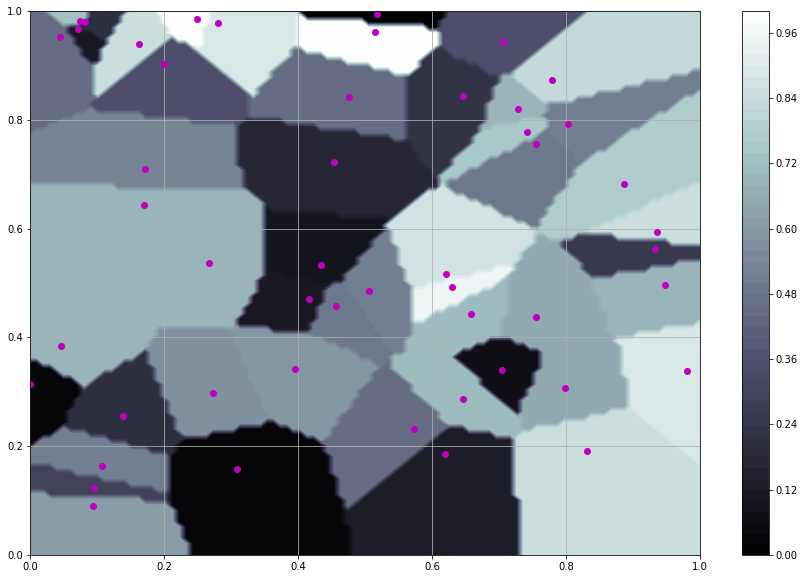

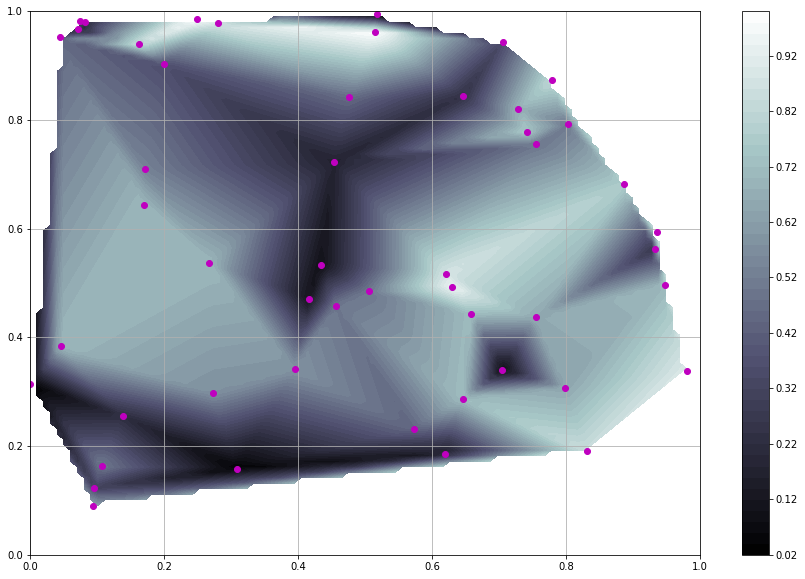

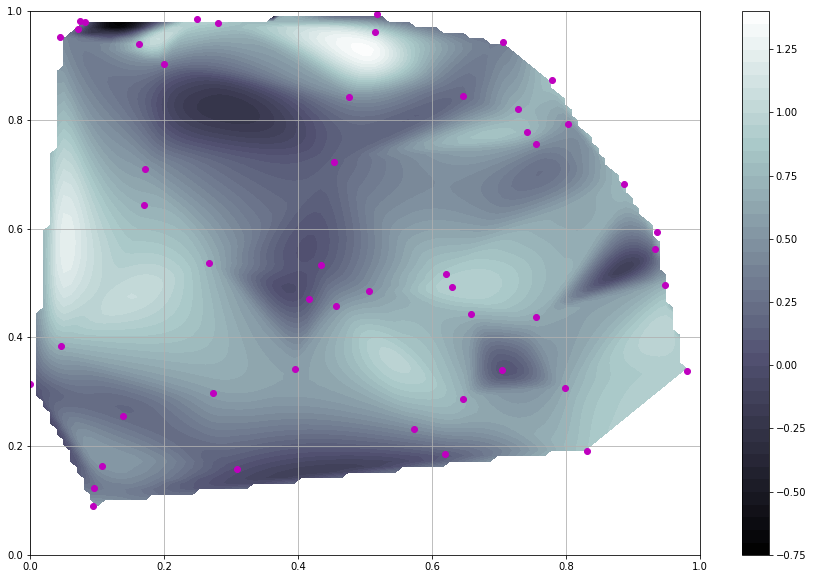

In [7]:
# Exercise 5

Ns = 100
xs = np.linspace(0., 1., Ns)
ys = np.linspace(0., 1., Ns)
Xs, Ys = np.meshgrid(xs, ys)
P = np.array([Xs.flatten(), Ys.flatten() ]).transpose()

XYdata = np.array([X,Y]).transpose()

Znearest = griddata(XYdata, Z, P, method = "nearest").reshape([Ns, Ns])
plt.figure(figsize=(15, 10))
plt.contourf(Xs, Ys, Znearest, 50, cmap ="bone")
plt.plot(X, Y, "om") 
plt.colorbar()
plt.grid()
plt.show()

Znearest = griddata(XYdata, Z, P, method = "linear").reshape([Ns, Ns])
plt.figure(figsize=(15, 10))
plt.contourf(Xs, Ys, Znearest, 50, cmap ="bone")
plt.plot(X, Y, "om") 
plt.colorbar()
plt.grid()
plt.show()

Znearest = griddata(XYdata, Z, P, method = "cubic").reshape([Ns, Ns])
plt.figure(figsize=(15, 10))
plt.contourf(Xs, Ys, Znearest, 50, cmap ="bone")
plt.plot(X, Y, "om") 
plt.colorbar()
plt.grid()
plt.show()